<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Tagup-Data-Science-Exercise" data-toc-modified-id="Tagup-Data-Science-Exercise-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Tagup Data Science Exercise</a></span><ul class="toc-item"><li><span><a href="#Objectives" data-toc-modified-id="Objectives-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Objectives</a></span></li><li><span><a href="#Notes-to-help" data-toc-modified-id="Notes-to-help-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Notes to help</a></span></li><li><span><a href="#Lets-inspect-the-data" data-toc-modified-id="Lets-inspect-the-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Lets inspect the data</a></span></li><li><span><a href="#Removal-of-noise-/-extreme-values" data-toc-modified-id="Removal-of-noise-/-extreme-values-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Removal of noise / extreme values</a></span></li><li><span><a href="#Detecting-Faulty-State" data-toc-modified-id="Detecting-Faulty-State-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Detecting Faulty State</a></span></li></ul></li><li><span><a href="#Executive-Summary" data-toc-modified-id="Executive-Summary-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Executive Summary</a></span></li><li><span><a href="#Technical-Notes:" data-toc-modified-id="Technical-Notes:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Technical Notes:</a></span></li></ul></div>

# Tagup Data Science Exercise

ExampleCo, Inc is gathering several types of data for its fleet of very expensive machines.  These very expensive machines have three operating modes: *normal*, *faulty* and *failed*.   The machines run all the time, and usually they are in normal mode.  However, in the event that the machine enters faulty mode, the company would like to be aware of this as soon as possible.  This way they can take preventative action to avoid entering failed mode and hopefully save themselves lots of money.

They collect four kinds of timeseries data for each machine in their fleet of very expensive machines.  When a machine is operating in *normal* mode the data behaves in a fairly predictable way, but with a moderate amount of noise.  Before a machine fails it will ramp into *faulty* mode, during which the data appears visibly quite different.  Finally, when a machine fails it enters a third, and distinctly different, *failed* mode where all signals are very close to 0.

You can download the data here: [exampleco_data](https://drive.google.com/open?id=1b12u6rzkG1AxB6wLGl7IBVoaoSoZLHNR)

## Objectives 

1. **Your primary objective is to develop an approach to detect the beginning of the “faulty” period**. Ideally, this approach would give the ExampleCo engineers as much time as possible to shut down their machines before failure occurs (at which time all measurements drop close to 0). The best solutions are automated in the sense that they would generalize to similar but slightly different data; simpler methods are acceptable but are less likely to receive full credit.
2. Demonstrate the efficacy of your approach using visualizations. You must also include a simple explanation of these figures and why your approach is effective, ideally written in language that non-technical executives could understand.
3. Finally, and now with a technical audience in mind, discuss the strengths and limitations of your approach and be sure to mention other approaches that you would have liked to try if you had more time.


## Notes to help
1. A good place to start is by addressing the noise due to communication
   errors.
2. Feel free to use any libraries you like. Your final results should be
   presented in this Python notebook.
3. There are no constraints on the techniques you bring to bear, we are curious
   to see how you think and what sort of resources you have in your toolbox.
4. **Be sure to clearly articulate what you did, why you did it, and how the
   results should be interpreted**. In particular, you should be aware of the
   limitations of whatever approach or approaches you take.
5. Don't feel compelled to use all the data if you're not sure how. Feel free
   to focus on data from a single unit if that makes it easier to get started.
6. Don't hesitate to reach out to datasciencejobs@tagup.io with any questions!

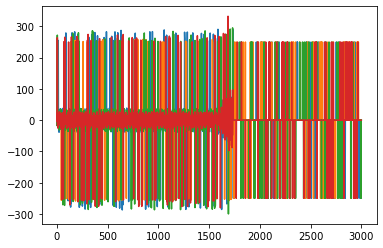

In [1]:
# To help you get started...
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

data = pd.read_csv('exampleco_data/machine_1.csv',index_col=0)

plt.plot(range(len(data)), data)
plt.show()

In [2]:
data.head()

,0,1,2,3
2019-01-01 00:00:00.000000000,12.588243,8.829718,-11.803474,10.083107
2019-01-01 08:00:09.603201067,10.822199,2.795246,11.560279,21.898688
2019-01-01 16:00:19.206402134,21.074661,-0.655051,-17.840580,-1.346748
2019-01-02 00:00:28.809603201,32.284431,6.544655,-13.498907,-4.281704
2019-01-02 08:00:38.412804268,28.073949,253.681988,271.983917,263.627071


## Lets inspect the data

Right off the bat we can see that there are some extreme values clouding our data, we will need to remove these to get to actual signal 

count    3000.000000
mean        0.794507
std        61.216819
min      -287.162507
25%        -9.516317
50%         0.000763
75%         9.777863
max       290.676099
Name: 0, dtype: float64


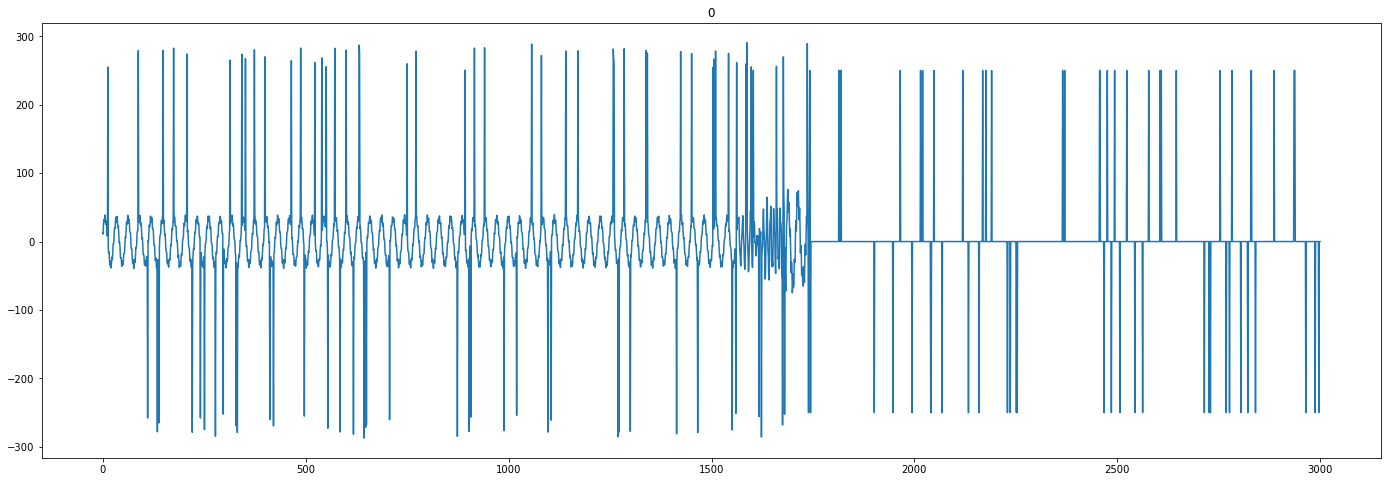

count    3000.000000
mean       -0.260459
std        56.020845
min      -258.698745
25%        -0.956447
50%        -0.000242
75%         1.036986
max       274.893736
Name: 1, dtype: float64


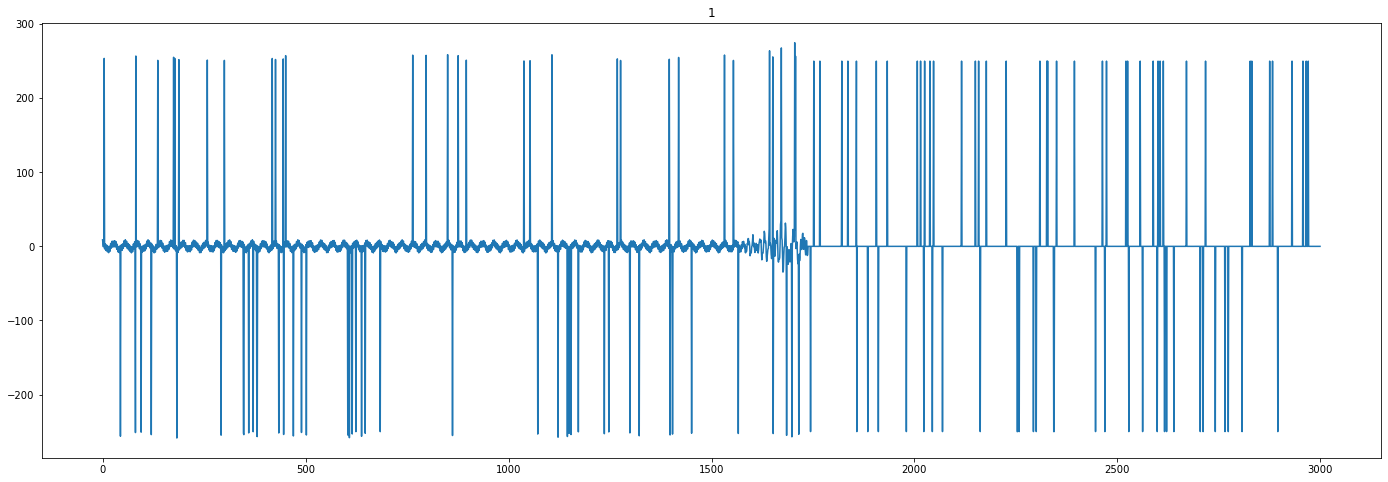

count    3000.000000
mean       -1.919033
std        59.644016
min      -299.880322
25%        -4.816727
50%         0.000104
75%         4.870864
max       295.250386
Name: 2, dtype: float64


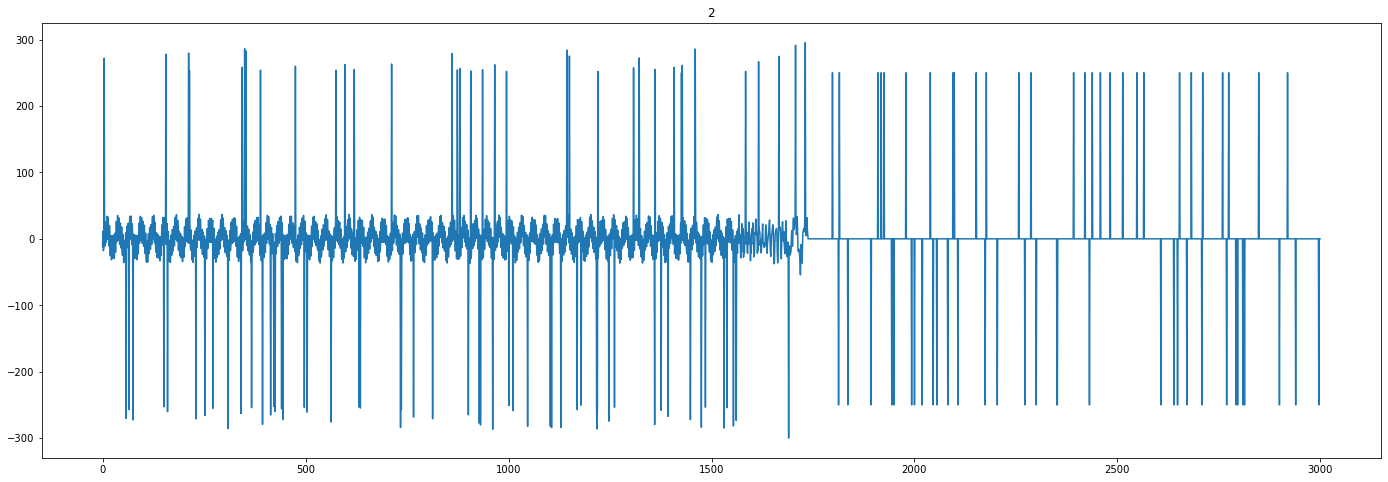

count    3000.000000
mean        0.186904
std        58.180892
min      -280.455335
25%        -2.529772
50%        -0.000430
75%         3.046651
max       332.462495
Name: 3, dtype: float64


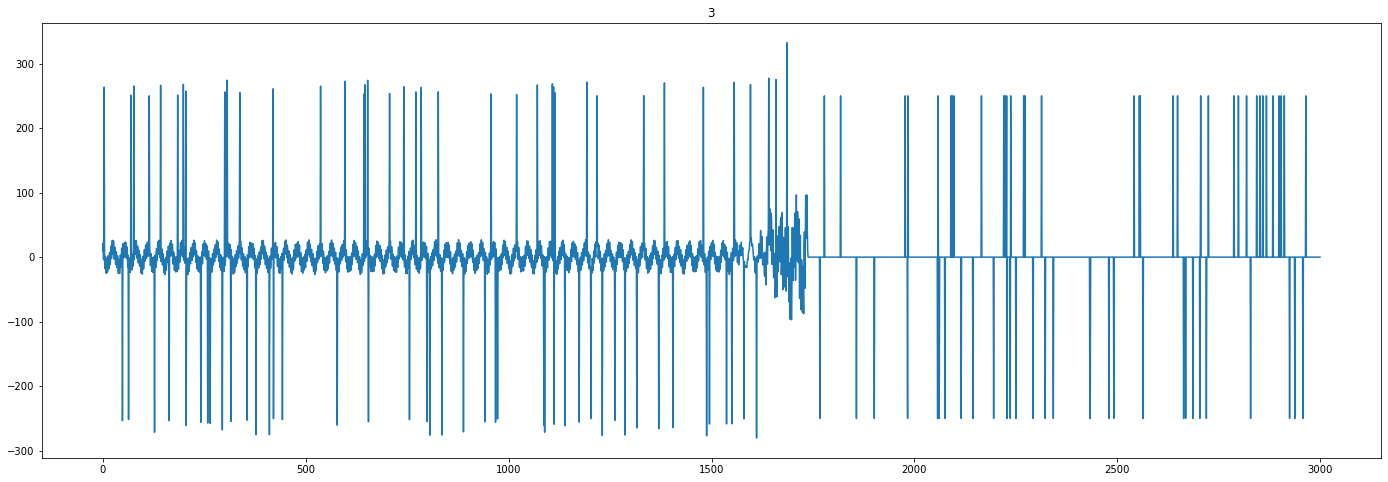

In [3]:
# start off with some histograms and summary stats of each column 

for col in data.columns:
    print(data[col].describe())
    plt.figure(figsize=(24,8))
    plt.plot(range(len(data)), data[col])
    plt.title(col)
    plt.show()


We can see from the histograms below that each variable is roughly centered between -50 and 50, with extreme values starting after 25, lets z-score our records and drop 5% most extreme values. We should always be careful when discarding data. 

#TODO
Make sure we arnt throwing away signal here / ensure our outlier band is not too narrow 

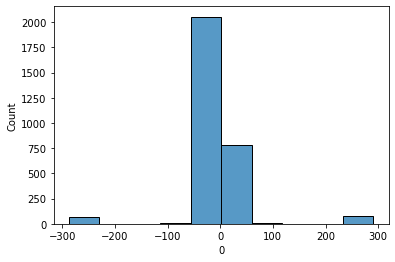

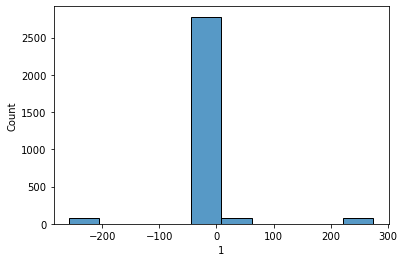

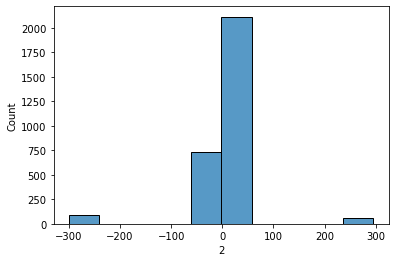

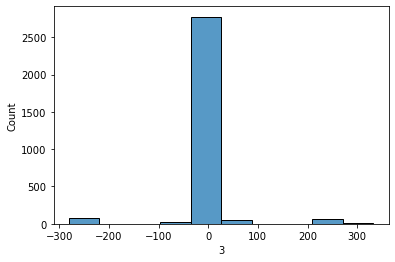

In [4]:
for col in data.columns: 
    sns.histplot(data[col], bins = 10)
    plt.show()

## Removal of noise / extreme values

We will z-score our data to find extraneous values we classify as noise, then impute with values that wont trigger any alarms in our anomoly detection framework. In this case, the column mean. 

In [5]:
# lets z-score our columns to remove noise 
cleaned_data = data.copy()
for col in cleaned_data:
    # replace noise with things that wont trigger alarms
    cleaned_data[col].where(
        ((abs(cleaned_data[col]) - cleaned_data[col].mean())/cleaned_data[col].std(ddof=0)) <2,\
        cleaned_data[col].mean(), inplace= True )        



count    3000.000000
mean       -0.007268
std        18.916561
min       -74.868627
25%        -5.123116
50%         0.001918
75%         4.915178
max        76.186253
Name: 0, dtype: float64


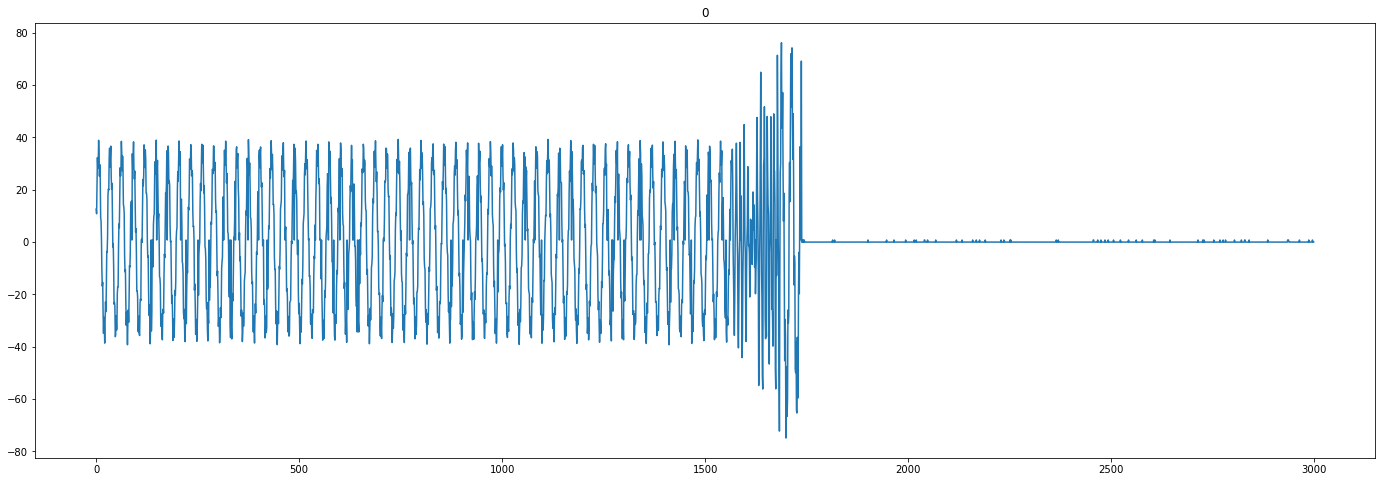

count    3000.000000
mean       -0.025827
std         4.162518
min       -34.758429
25%        -0.472933
50%        -0.001623
75%         0.607402
max        34.248961
Name: 1, dtype: float64


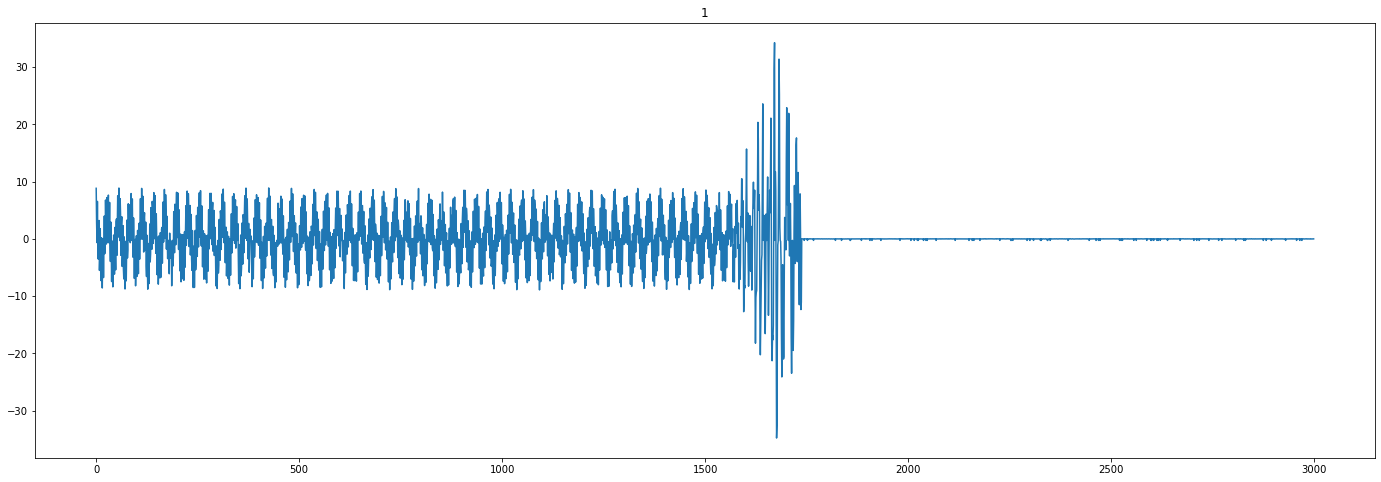

count    3000.000000
mean        0.042304
std        13.743840
min       -54.242504
25%        -1.948417
50%        -0.001306
75%         2.846926
max        36.848510
Name: 2, dtype: float64


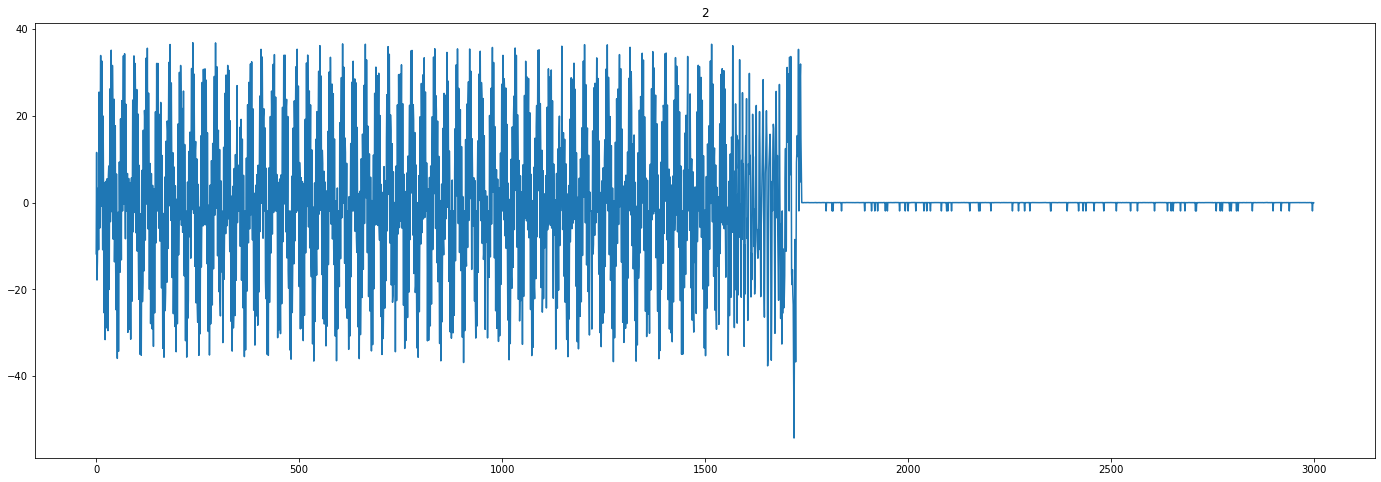

count    3000.000000
mean        0.181904
std        12.773257
min       -97.080249
25%        -1.016736
50%         0.001146
75%         1.456473
max        96.453001
Name: 3, dtype: float64


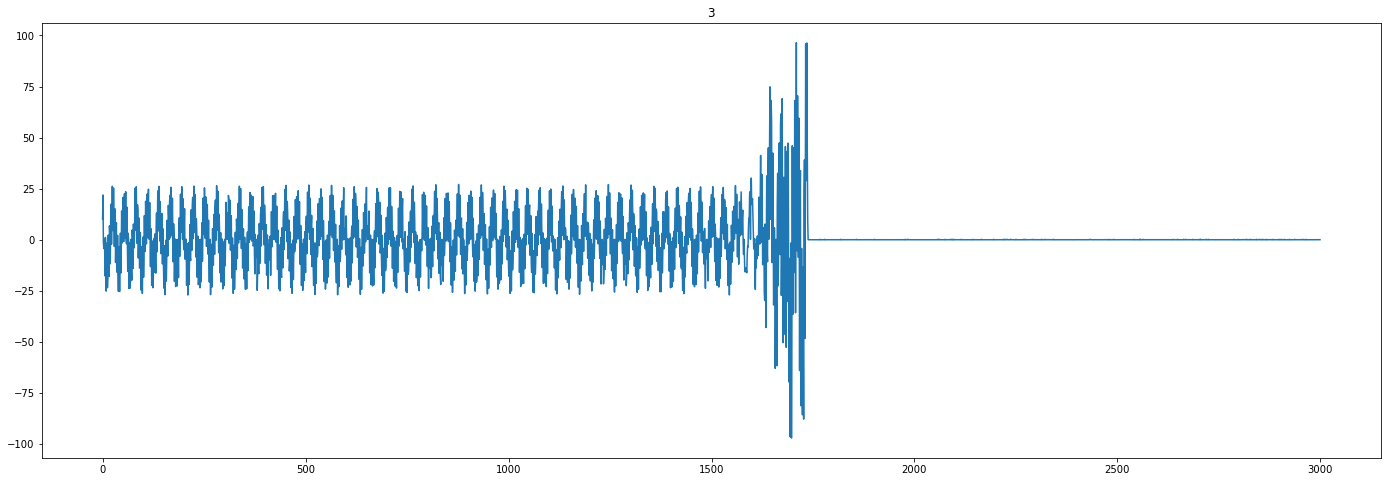

In [6]:
# histograms of cleaned data

for col in cleaned_data.columns:
    print(cleaned_data[col].describe())
    plt.figure(figsize=(24,8))
    plt.plot(range(len(cleaned_data)), cleaned_data[col])
    plt.title(col)
    plt.show()


After cleaning the data we can visually clearly see when the machine failed, and we can visually see the increase in amplitude during the faulty state aswell

## Detecting Faulty State

The normal operating stage and the failure stages are both fairly predictable looking, using this as an assumption I will implement an auto-encoder approach, wherin a NN takes in a vector and encodes then decodes it.

This is very helpful in an anomoly detection setting as vectors that are out of the ordinary will be very hard for the auto encoder to reproduce, thereore we can rank the most poorly re-constucted vectors and use this as a score of abnormality, or in our case, the increased variance we see in the faulty stage. 

**In laymens terms, if the computer st
ruggles to recreate our sensors data at a given timestamp, it is likely an aberration, which describes what we know about about the faulty state.**




In [7]:
# first lets z-scale our cleaned data
z_data = (abs(cleaned_data) - cleaned_data.mean())/cleaned_data.std(ddof=0)

In [8]:
from keras.models import Model
from keras.layers import Input, Dense

# placeholder for input
data_in = Input(shape=(4,))
# dimension of the encoded data. choosing 2
encoded_dim = 2
# encoded representation of the data
encoded = Dense(encoded_dim, activation='tanh')(data_in)
# reconstruction of the input
decoded = Dense(4,activation='tanh')(encoded)
# this model maps the input data to the reconstructed data
autoencoder = Model(data_in, decoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')


# selecting 14 epochs as I saw occilating loss values after this
autoencoder.fit(z_data,z_data, epochs=14, shuffle=True, validation_data=(z_data,z_data))



Using TensorFlow backend.


Train on 3000 samples, validate on 3000 samples
Epoch 1/14
3000/3000 [==============================] - 0s 74us/step - loss: 0.9966 - val_loss: 0.9010
Epoch 2/14
3000/3000 [==============================] - 0s 47us/step - loss: 0.8198 - val_loss: 0.7452
Epoch 3/14
3000/3000 [==============================] - 0s 46us/step - loss: 0.6891 - val_loss: 0.6377
Epoch 4/14
3000/3000 [==============================] - 0s 47us/step - loss: 0.5996 - val_loss: 0.5650
Epoch 5/14
3000/3000 [==============================] - 0s 46us/step - loss: 0.5383 - val_loss: 0.5138
Epoch 6/14
3000/3000 [==============================] - 0s 46us/step - loss: 0.4950 - val_loss: 0.4772
Epoch 7/14
3000/3000 [==============================] - 0s 46us/step - loss: 0.4633 - val_loss: 0.4502
Epoch 8/14
3000/3000 [==============================] - 0s 43us/step - loss: 0.4391 - val_loss: 0.4286
Epoch 9/14
3000/3000 [==============================] - 0s 45us/step - loss: 0.4198 - val_loss: 0.4111
Epoch 10/14
3000/3000 [==

In [9]:
# lets turn the error into a positive score per row 
auto_out = autoencoder.predict(z_data)
error = auto_out - z_data
p=2
oop=1/p
score = ((error.abs()**p).sum(axis=1))**oop

# lets inspect our score list, it looks hopeful since several points near each other in time are at the top 
score = score.sort_values(ascending=False)
score

2020-07-11 04:27:26.948983000    8.269390
2020-07-12 20:28:14.964988328    7.988488
2020-07-18 20:31:07.822607536    7.834541
2020-07-14 20:29:12.584194736    7.315177
2020-07-13 04:28:24.568189400    7.135327
                                   ...   
2021-01-13 05:56:45.535178392    0.083705
2021-04-05 06:36:07.922640880    0.083700
2021-08-01 07:32:47.455818608    0.083674
2021-05-19 14:57:25.148382800    0.083633
2021-04-21 06:43:48.876292096    0.083609
Length: 3000, dtype: float64

# Executive Summary 
The below graph shows the sensor data we recieve, each color represents a different type of sensor data, the two vertical lines show when the machine actually entered the fauly state (purple), and when our algorithm detected the faulty state (black). Therefore **the ideal algorithm would have the black line perfectly over the purple line**

Looking at the graphs of our results, we can see that while we are able to detect the state change for a faulty machine, we were not able to do it perfectly, which would possible maximize client response time to a faulty machine. 

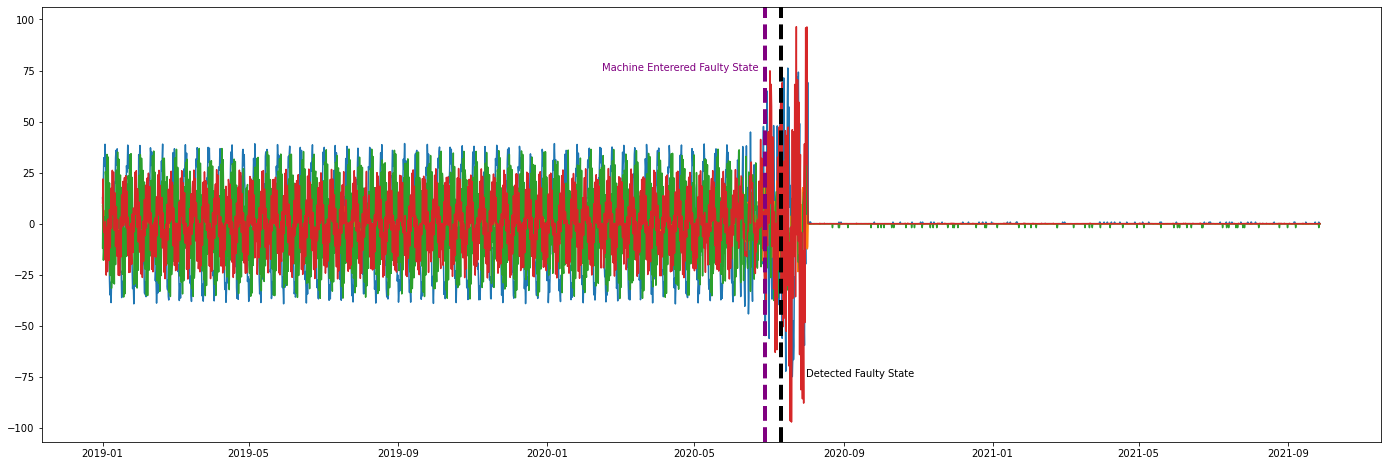

In [10]:
index_of_failing = pd.to_datetime(score.index[0])
plt.figure(figsize=(24,8))
plt.plot(pd.to_datetime(cleaned_data.index), cleaned_data)
plt.axvline(x=index_of_failing, linestyle ='--', lw = 4, color = 'black')
plt.axvline(x=pd.to_datetime('2020/06/28'), linestyle ='--', lw = 4, color = 'purple')
plt.annotate('Machine Enterered Faulty State', (pd.to_datetime('2020/02/15'),75), color = 'purple')
plt.annotate('Detected Faulty State', (pd.to_datetime('2020/08/01'),-75))
plt.show()


# Technical Notes: 

**Strengths:**
 - Computationally light, this could handle sensor data that reports each second 
 - Simple and elegant to understand
 
**Weaknesses:**
  - Without LSTM integration as mentioned below, we throw away basically all temporal signal
  - Works best with heuritics that would need to be applied by client (and potentially by machine)
  - No cool "deep learning" marketing possibilities when implemented as-is


**Given more time I would like to perform the following analyses:**

- Run all machines through autoencoder and aggregate results

- Try applying heuristics to the scores from the autoencoders, including taking the earliest point of the top 10 or so points. Which may get us an earlier warning point. 

- Because this particular problem is heavily based on wave behavior, a physics grounded approach would likely work well, with techniques such as fourier decomposition and amplitude anlaysis 

- Note that, layers of autoencoders can also be composed of LSTMs. Therefore, timeseries sequential data signal can be captured too, I am not attempting this due to time constraints,

- Other modeling aproaches for anomolous time series, including DBSCAN, and Volterra Connectionist Model (VCM) using autocorrelation as input

- A decomposition and reconstuction similar to auto-encoders can be performed using PCA, it may be more balanced to use both PCA and autoencoders and take the average of the rank scores. 

- Quantitatively validate where faulty state begins to find time difference between detection and actuals 

